In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import and visualise data
data=pd.read_csv('finaldata')


del data['Unnamed: 0']
del data['customer']

data

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Arizona,F,Bachelor,697953,0,94,0,Personal Auto,Four-Door Car,1131
1,Nevada,F,Bachelor,1288743,48767,108,0,Personal Auto,Two-Door Car,566
2,California,M,Bachelor,764586,0,106,0,Corporate Auto,SUV,529
3,Washington,M,High School or Below,536307,36357,68,0,Personal Auto,Four-Door Car,17
4,Oregon,F,Bachelor,825629,62902,69,0,Personal Auto,Two-Door Car,159
...,...,...,...,...,...,...,...,...,...,...
1063,Oregon,M,Master,305955,38644,78,1,Personal Auto,Four-Door Car,361
1064,California,F,High School or Below,2031499,63209,102,2,Personal Auto,SUV,207
1065,Arizona,F,Bachelor,323912,16061,88,0,Personal Auto,Four-Door Car,633
1066,California,F,Master,462680,79487,114,0,Special Auto,SUV,547


In [2]:
#print data types for each column
data.dtypes

state                        object
gender                       object
education                    object
customer_lifetime_value       int64
income                        int64
monthly_premium_auto          int64
number_of_open_complaints     int64
policy_type                  object
vehicle_class                object
total_claim_amount            int64
dtype: object

In [3]:
#separate numerical and categorical columns into two individual data types
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = object)

X_num

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,697953,0,94,0,1131
1,1288743,48767,108,0,566
2,764586,0,106,0,529
3,536307,36357,68,0,17
4,825629,62902,69,0,159
...,...,...,...,...,...
1063,305955,38644,78,1,361
1064,2031499,63209,102,2,207
1065,323912,16061,88,0,633
1066,462680,79487,114,0,547


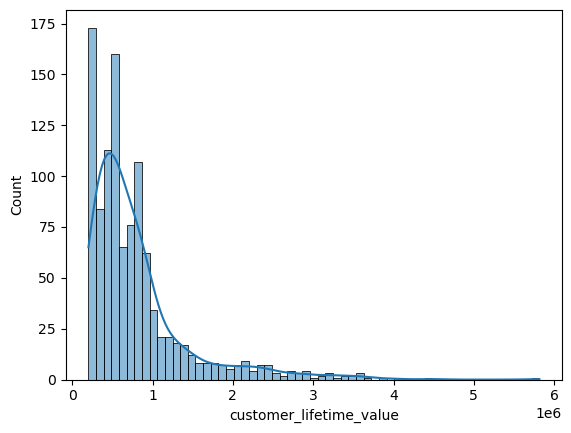

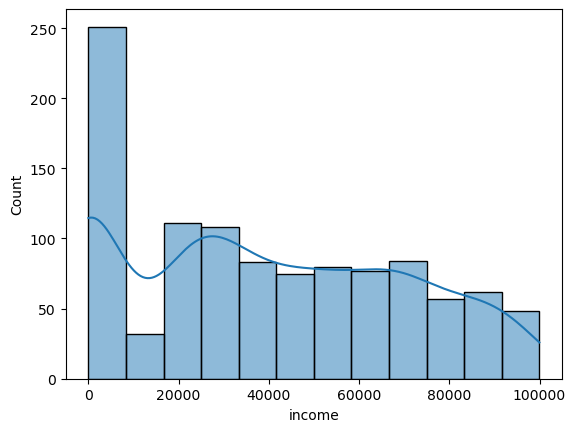

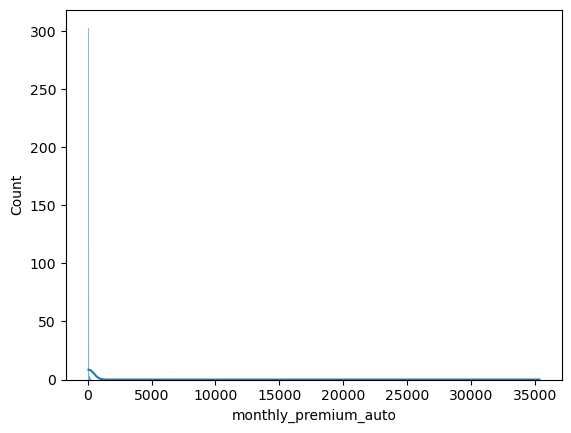

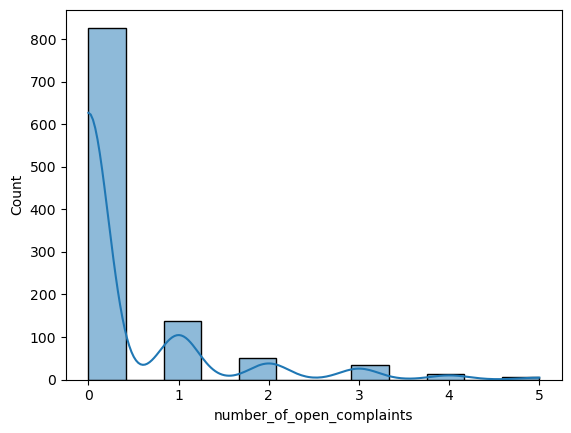

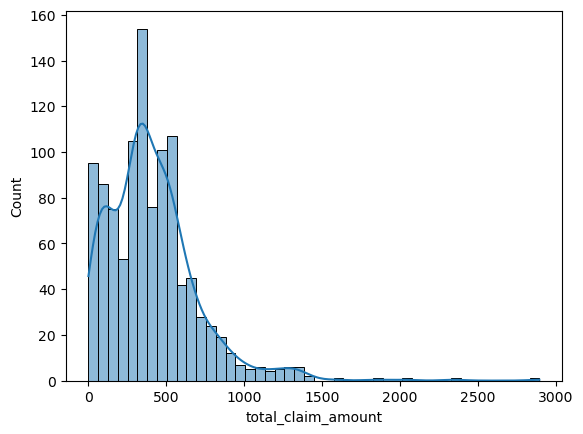

In [4]:
#construct distribution plots for numerical values

# #for individual plotting
# sns.displot(data['customer_lifetime_value'])
# plt.show()
# sns.displot(data['income'])
# plt.show()
# sns.displot(data['monthly_premium_auto'])
# plt.show()
# sns.displot(data['number_of_open_complaints'])
# plt.show()
# sns.displot(data['total_claim_amount'])
# plt.show()
# plt.hist(data['number_of_open_complaints'])
# plt.show()

for column in X_num.columns:
    sns.histplot(data=X_num, x=column, kde=True)
    plt.show()

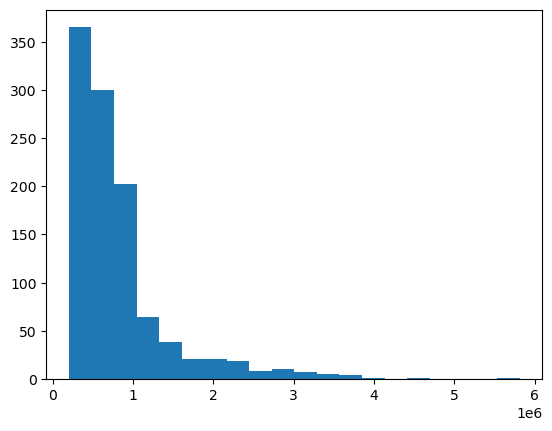

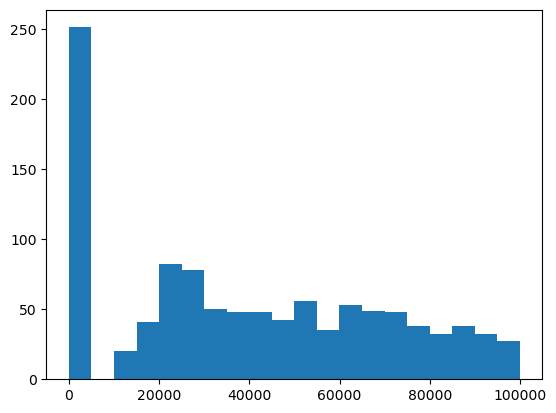

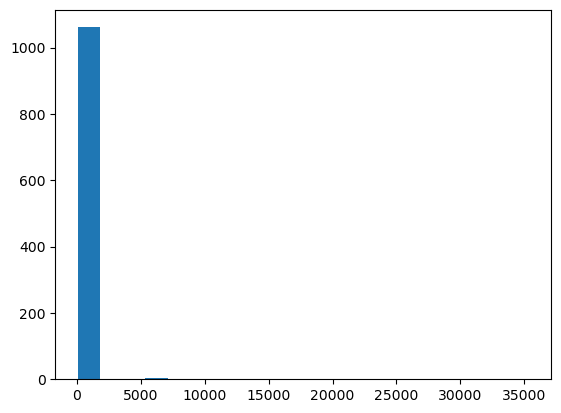

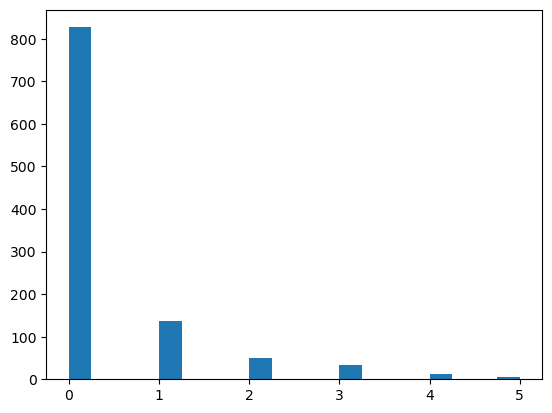

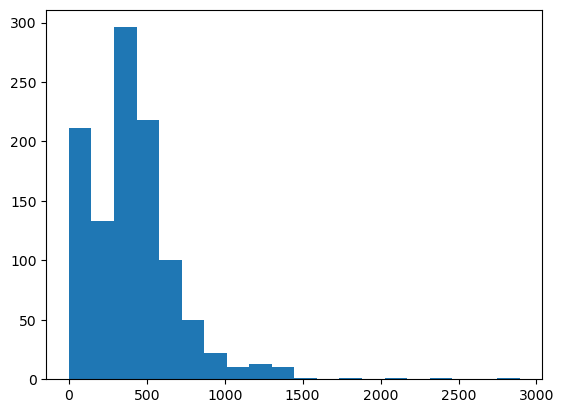

In [5]:
#Use Matplotlib to construct histograms
for column in X_num.columns:
    plt.hist(X_num[column], bins=20)
    plt.show()

In [6]:
# The only values which are normally distributed are customer lifetime value and total claim amount.

In [4]:
#make a correlation matrix table
correlations_matrix = X_num.corr()
correlations_matrix


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
customer_lifetime_value,1.000000,0.041648,0.005027,-0.028155,0.131674
income,0.041648,1.000000,0.049803,-0.004455,-0.363551
monthly_premium_auto,0.005027,0.049803,1.000000,0.025299,-0.040067
number_of_open_complaints,-0.028155,-0.004455,0.025299,1.000000,0.007095
total_claim_amount,0.131674,-0.363551,-0.040067,0.007095,1.000000


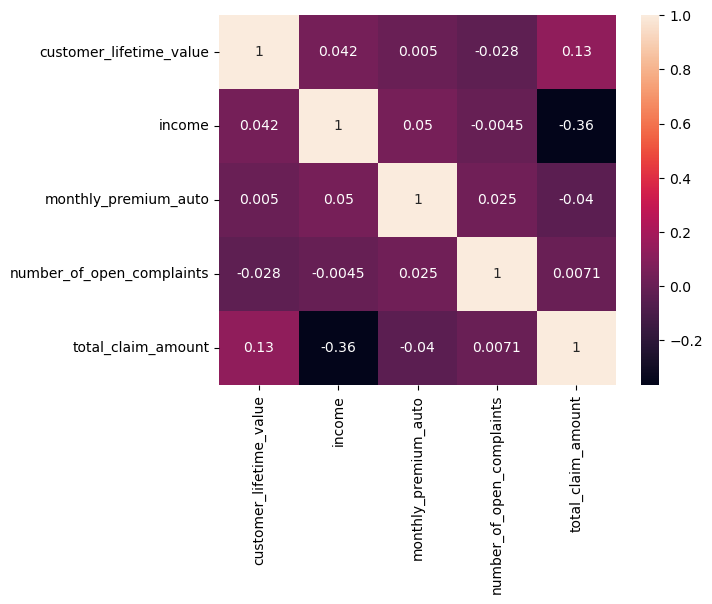

In [5]:
#make a correlation matrix heat map
correlations_matrix = X_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [6]:
#import modules
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

#drop total claim amaount and create a new table
y = X_num['total_claim_amount']
X = X_num.drop(['total_claim_amount'], axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,697953,0,94,0
1,1288743,48767,108,0
2,764586,0,106,0
3,536307,36357,68,0
4,825629,62902,69,0
...,...,...,...,...
1063,305955,38644,78,1
1064,2031499,63209,102,2
1065,323912,16061,88,0
1066,462680,79487,114,0


In [28]:
#Scale the numerical data

transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
x_normalized
x_normalized=pd.DataFrame(x_normalized, columns=X.columns)

(1068, 4)


In [8]:
X_cat

,state,gender,education,policy_type,vehicle_class
0,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1,Nevada,F,Bachelor,Personal Auto,Two-Door Car
2,California,M,Bachelor,Corporate Auto,SUV
3,Washington,M,High School or Below,Personal Auto,Four-Door Car
4,Oregon,F,Bachelor,Personal Auto,Two-Door Car
...,...,...,...,...,...
1063,Oregon,M,Master,Personal Auto,Four-Door Car
1064,California,F,High School or Below,Personal Auto,SUV
1065,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1066,California,F,Master,Special Auto,SUV


In [35]:
# One Hot/Label Encoding (categorical). for state

#one hot encoding is a way to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat[['state']])
print(encoder.categories_)
encoded = encoder.transform(X_cat[['state']]).toarray()
print(encoded)
onehot_encoded_state = pd.DataFrame(encoded,columns=['Oregon','Arizona','Washington','Nevada'])
onehot_encoded_state.head(20)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object)]
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


,Oregon,Arizona,Washington,Nevada
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0


In [38]:
# gender is encoded
encoder = OneHotEncoder(drop='first').fit(X_cat[['gender']])
print(encoder.categories_)
encoded = encoder.transform(X_cat[['gender']]).toarray()
print(encoded)
onehot_encoded_gender = pd.DataFrame(encoded,columns=['M'])

[array(['F', 'M'], dtype=object)]
[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [33]:
# One Hot/Label Encoding (categorical) education
encoder = OneHotEncoder(drop='first').fit(X_cat[['education']])
print(encoder.categories_)
encoded = encoder.transform(X_cat[['education']]).toarray()
print(encoded)
onehot_encoded_education = pd.DataFrame(encoded,columns=['College','High School or Below','Master','Doctor'])

[array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object)]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [39]:
# policy type is encoded 
encoder = OneHotEncoder(drop='first').fit(X_cat[['policy_type']])
print(encoder.categories_)
encoded = encoder.transform(X_cat[['policy_type']]).toarray()
print(encoded)
onehot_encoded_policy_type = pd.DataFrame(encoded,columns=['Personal Auto','Special Auto'])
onehot_encoded.head(20)

[array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)]
[[1. 0.]
 [1. 0.]
 [0. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


,Oregon,Arizona,Washington,Nevada
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0


In [40]:
# One Hot/Label Encoding (categorical). vehicle class
encoder = OneHotEncoder(drop='first').fit(X_cat[['vehicle_class']])
print(encoder.categories_)
encoded = encoder.transform(X_cat[['vehicle_class']]).toarray()
print(encoded)
onehot_encoded_vehicle_class = pd.DataFrame(encoded,columns=['Two-Door Car','SUV','Luxury'])

[array(['Four-Door Car', 'Luxury', 'SUV', 'Two-Door Car'], dtype=object)]
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [42]:
X = pd.concat([x_normalized, onehot_encoded_state, onehot_encoded_gender, onehot_encoded_education,onehot_encoded_policy_type, onehot_encoded_vehicle_class], axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,Oregon,Arizona,Washington,Nevada,M,College,High School or Below,Master,Doctor,Personal Auto,Special Auto,Two-Door Car,SUV,Luxury
0,0.088586,0.000000,0.000935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.193779,0.487865,0.001332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.100450,0.000000,0.001275,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.059804,0.363715,0.000198,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.111319,0.629272,0.000227,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0.018788,0.386595,0.000482,0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1064,0.326031,0.632343,0.001162,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1065,0.021986,0.160674,0.000765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1066,0.046694,0.795188,0.001502,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [43]:
# LINEAR REGRESSION

#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(854, 18)
(214, 18)
(854,)
(214,)


In [46]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [47]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.36724541440628733

In [48]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.405297224041396

In [50]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

41164.07405032479

In [51]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

202.88931477612317

In [52]:
from sklearn.metrics import mean_absolute_error, r2_score

In [53]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

157.8804648674848
